In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading the CSV file
import pandas as pd
df_csv = pd.read_csv('/content/drive/Shareddrives/ResearchProject_RAWork/PSN 2020 ITSA Monthly Data.csv')

In [ ]:
df_csv

,Month,HomicideArrests,HomicideCount,NonfatalshootingArrests,NonfatalshootingCount,ShootReview,YEAR_,MONTH_,DATE_,GunHomicideClearance,NonFatalShootingClearance
0,1,1,2,4,17,0.0,2010,1,1-Jan-10,0.50,0.24
1,2,0,2,1,4,0.0,2010,2,1-Feb-10,0.00,0.25
2,3,0,0,0,0,0.0,2010,3,1-Mar-10,0.00,0.00
3,4,2,7,1,16,0.0,2010,4,1-Apr-10,0.29,0.06
4,5,0,1,1,13,0.0,2010,5,1-May-10,0.00,0.08
...,...,...,...,...,...,...,...,...,...,...,...
147,148,0,6,1,11,1.0,2022,4,1-Apr-22,0.00,0.09
148,149,1,4,4,15,1.0,2022,5,1-May-22,0.25,0.27
149,150,1,7,1,21,1.0,2022,6,1-Jun-22,0.14,0.05
150,151,1,2,1,13,1.0,2022,7,1-Jul-22,0.50,0.08


In [ ]:
#df_csv['ShootReview'] = df_csv['ShootReview'].astype('int64')
#df_csv['GunHomicideClearance'] = df_csv['GunHomicideClearance'].astype('int64')
#df_csv['NonFatalShootingClearance'] = df_csv['NonFatalShootingClearance'].astype('int64')

In [ ]:
df_csv['DATE_']=pd.to_datetime(df_csv['DATE_'])

In [ ]:
df_csv.dtypes

Month                                 int64
HomicideArrests                       int64
HomicideCount                         int64
NonfatalshootingArrests               int64
NonfatalshootingCount                 int64
ShootReview                         float64
YEAR_                                 int64
MONTH_                                int64
DATE_                        datetime64[ns]
GunHomicideClearance                float64
NonFatalShootingClearance           float64
dtype: object

In [ ]:
df_csv['GunHomicideClearance'].describe()

count    152.000000
mean       0.286316
std        0.304865
min        0.000000
25%        0.000000
50%        0.225000
75%        0.500000
max        1.000000
Name: GunHomicideClearance, dtype: float64

In [ ]:
df_csv['NonFatalShootingClearance'].describe()

count    152.000000
mean       0.125197
std        0.108408
min        0.000000
25%        0.040000
50%        0.110000
75%        0.180000
max        0.500000
Name: NonFatalShootingClearance, dtype: float64

In [ ]:
#df_csv['GunHomicideClearance'].plot()

In [ ]:
#df_csv['NonFatalShootingClearance'].plot()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result1=adfuller(df_csv['GunHomicideClearance'])
test_result2=adfuller(df_csv['NonFatalShootingClearance'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df_csv['GunHomicideClearance'])

ADF Test Statistic : -7.0803978320359615
p-value : 4.682687375875857e-10
#Lags Used : 1
Number of Observations Used : 150
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
adfuller_test(df_csv['NonFatalShootingClearance'])

ADF Test Statistic : -12.32687118828221
p-value : 6.559191882332522e-23
#Lags Used : 0
Number of Observations Used : 151
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
import statsmodels.api as sm
#from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model1=sm.tsa.arima.ARIMA(df_csv['GunHomicideClearance'],order=(0,0,0))
model1_fit=model1.fit()
model2=sm.tsa.arima.ARIMA(df_csv['NonFatalShootingClearance'],order=(0,0,0))
model2_fit=model2.fit()

In [ ]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:     GunHomicideClearance   No. Observations:                  152
Model:                            ARIMA   Log Likelihood                 -34.618
Date:                  Tue, 08 Aug 2023   AIC                             73.237
Time:                          17:08:31   BIC                             79.284
Sample:                               0   HQIC                            75.693
                                  - 152                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2863      0.033      8.735      0.000       0.222       0.351
sigma2         0.0923      0.014      6.711      0.000       0.065       0.119
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):                23.14
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.95
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     NonFatalShootingClearance   No. Observations:                  152
Model:                                 ARIMA   Log Likelihood                 122.545
Date:                       Tue, 08 Aug 2023   AIC                           -241.090
Time:                               17:08:37   BIC                           -235.042
Sample:                                    0   HQIC                          -238.633
                                       - 152                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1252      0.011     11.877      0.000       0.105       0.146
sigma2         0.0117      0.001      8.883      0.000       0.009       0.014
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                29.87
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.96
Prob(H) (two-sided):                  0.56   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

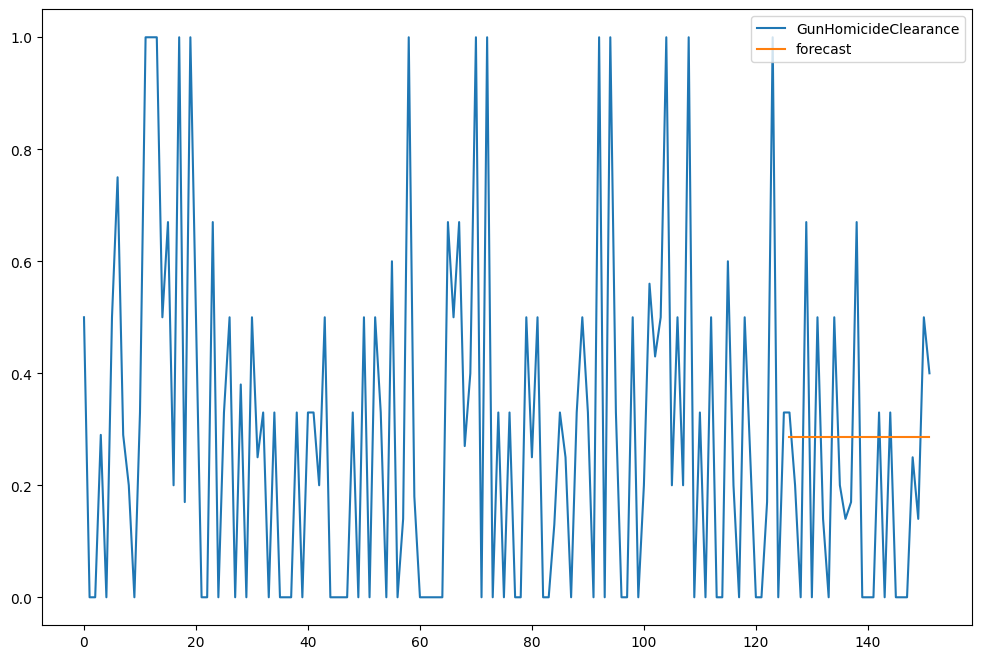

In [ ]:
df_csv['forecast']=model1_fit.predict(start=126,end=152,dynamic=True)
df_csv[['GunHomicideClearance','forecast']].plot(figsize=(12,8))

<Axes: >

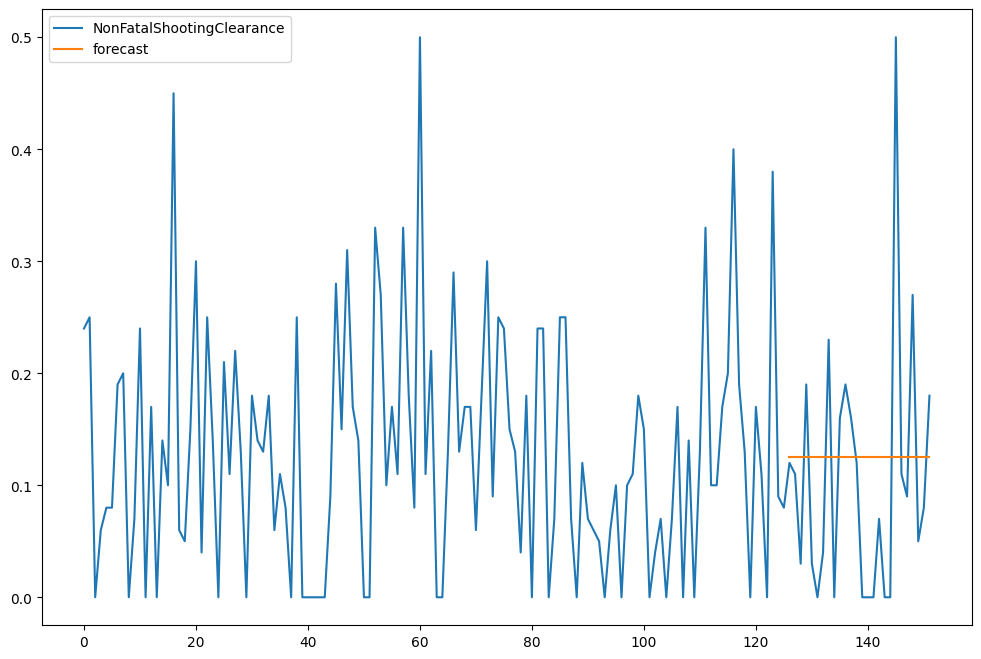

In [ ]:
df_csv['forecast']=model2_fit.predict(start=126,end=152,dynamic=True)
df_csv[['NonFatalShootingClearance','forecast']].plot(figsize=(12,8))

In [ ]:
model3=sm.tsa.arima.ARIMA(df_csv['HomicideArrests'],df_csv['HomicideCount'],order=(0,0,0))
model3_fit=model3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        HomicideArrests   No. Observations:                  152
Model:                          ARIMA   Log Likelihood                -180.630
Date:                Tue, 08 Aug 2023   AIC                            367.259
Time:                        17:14:41   BIC                            376.331
Sample:                             0   HQIC                           370.945
                                - 152                                         
Covariance Type:                  opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1561      0.140      1.116      0.264      -0.118       0.430
HomicideCount     0.2292      0.029      8.006      0.000       0.173       0.285
sigma2            0.6305      0.077      8.181      0.000       0.479       0.782
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):                 8.61
Prob(Q):                              0.37   Prob(JB):                         0.01
Heteroskedasticity (H):               1.48   Skew:                             0.57
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

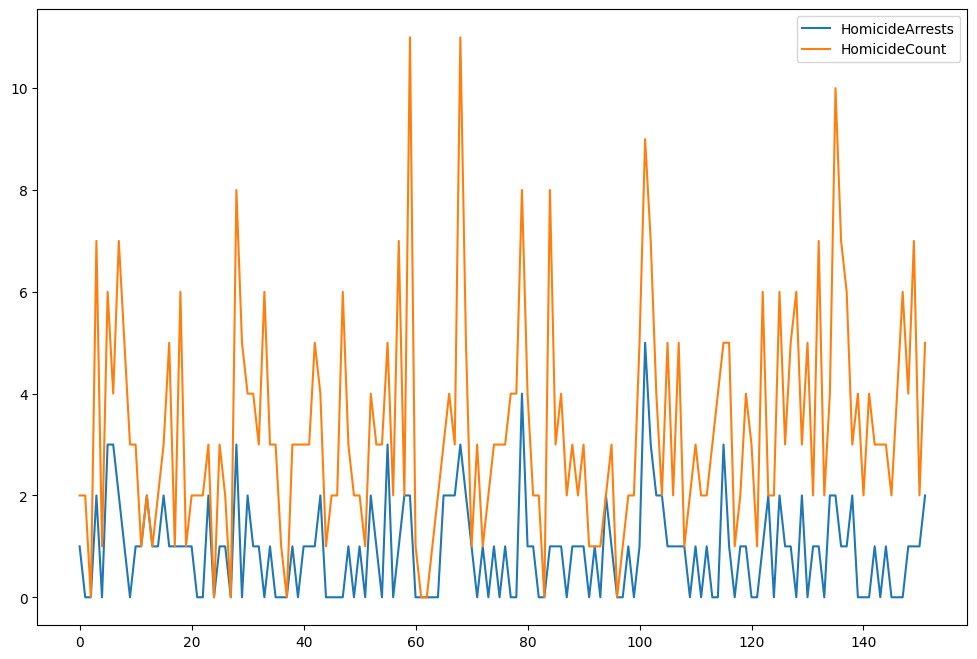

In [ ]:
df_csv[['HomicideArrests','HomicideCount']].plot(figsize=(12,8))

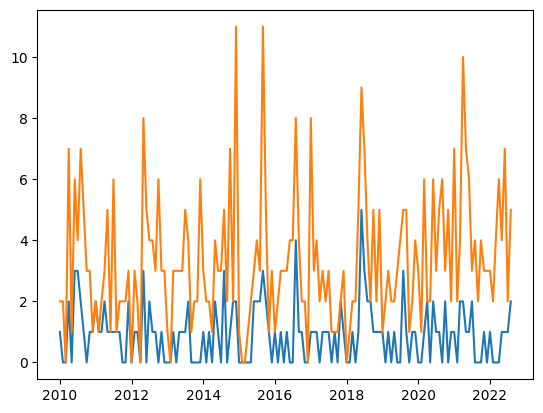

In [ ]:
import matplotlib.pyplot as plt
X=df_csv[['DATE_']]
Y=df_csv[['HomicideArrests','HomicideCount']]
plt.plot(X, Y)

In [ ]:
model4=sm.tsa.arima.ARIMA(df_csv['NonfatalshootingArrests'],df_csv['NonfatalshootingCount'],order=(0,0,0))
model4_fit=model4.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     NonfatalshootingArrests   No. Observations:                  152
Model:                               ARIMA   Log Likelihood                -267.275
Date:                     Tue, 08 Aug 2023   AIC                            540.550
Time:                             17:17:18   BIC                            549.622
Sample:                                  0   HQIC                           544.235
                                     - 152                                         
Covariance Type:                       opg                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3106      0.378      0.821      0.412      -0.431       1.052
NonfatalshootingCount     0.1024      0.020      4.995      0.000       0.062       0.143
sigma2                    1.9717      0.271      7.282      0.000       1.441       2.502
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 7.64
Prob(Q):                              0.75   Prob(JB):                         0.02
Heteroskedasticity (H):               1.20   Skew:                             0.55
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

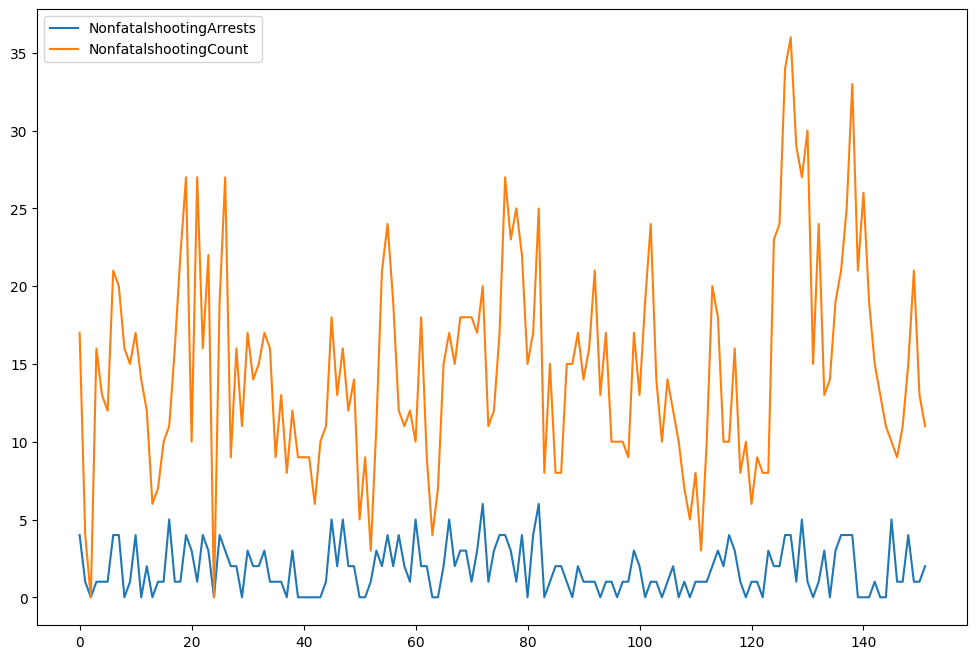

In [ ]:
df_csv[['NonfatalshootingArrests','NonfatalshootingCount']].plot(figsize=(12,8))

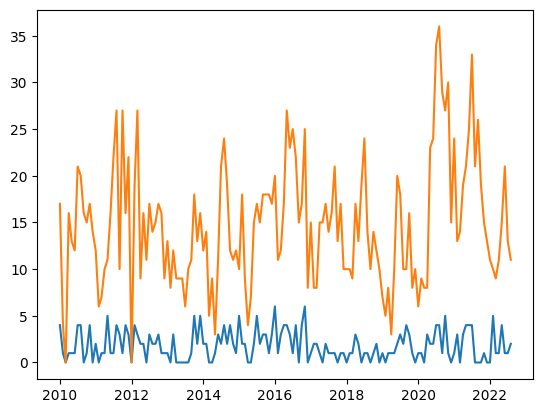

In [ ]:
import matplotlib.pyplot as plt
X=df_csv[['DATE_']]
Y=df_csv[['NonfatalshootingArrests','NonfatalshootingCount']]
plt.plot(X, Y)

<Axes: >

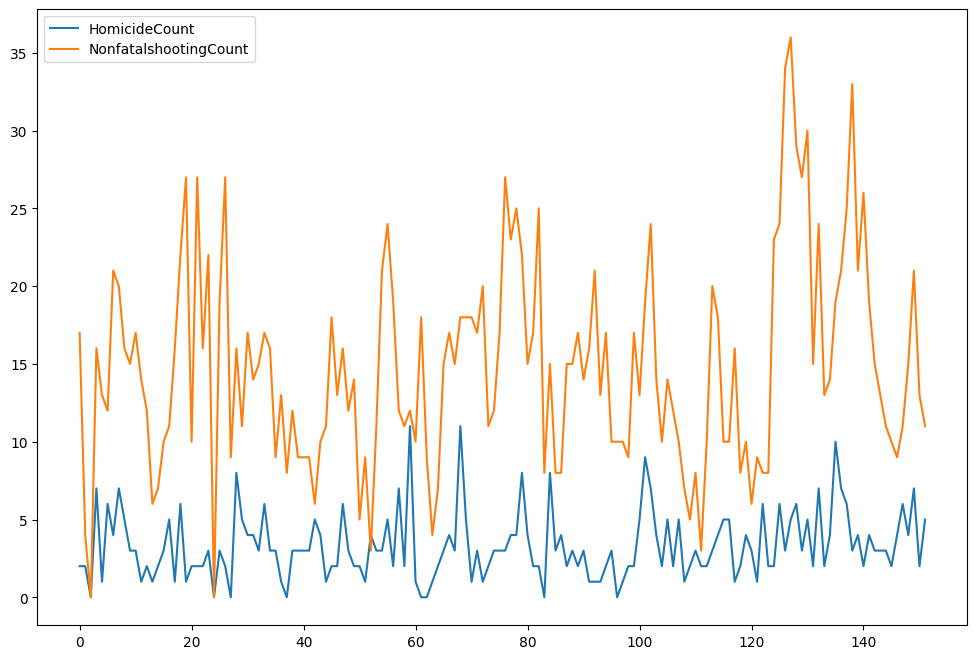

In [ ]:
df_csv[['HomicideCount','NonfatalshootingCount']].plot(figsize=(12,8))


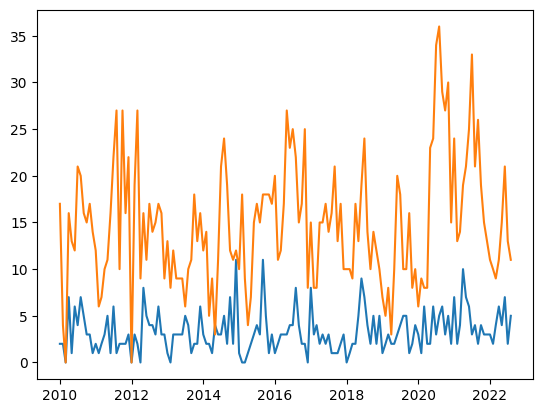

In [ ]:
import matplotlib.pyplot as plt
X=df_csv[['DATE_']]
Y=df_csv[['HomicideCount','NonfatalshootingCount']]
plt.plot(X, Y)